# Восстановление золота из руды

Цель - подготовить прототип модели машинного обучения.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.


## Подготовка данных

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [ ]:
def research(data):

    print(data.shape)
    print(data.info()) 
    print(data.head())

In [ ]:
research(train_data)

(14149, 87)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-nu

In [ ]:
research(test_data)

(5290, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  p

In [ ]:
research(full_data)

(19439, 87)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-nu

##### Проверка эффективности обогащения

In [ ]:
columns_mae = ['rougher.output.recovery',
           'rougher.output.concentrate_au',
           'rougher.input.feed_au',
           'rougher.output.tail_au']

data_temp = train_data[columns_mae].dropna()

In [ ]:
C = train_data['rougher.output.concentrate_au']
F = train_data['rougher.input.feed_au']
T = train_data['rougher.output.tail_au']

In [ ]:
calculation = ((C * (F - T)) / (F * (C - T))) * 100

In [ ]:
print('MAE:', mean_absolute_error(data_temp['rougher.output.recovery'], calculation))

MAE: 9.73512347450521e-15


MAE довольна мала, считаем что Recovery посчитан верно.

In [ ]:
print(train_data.shape)
print(test_data.shape)

(14149, 87)
(5290, 53)


##### Проанализируем признаки, недоступные в тестовой выборке.

In [ ]:
missing_cols = train_data.columns.drop(test_data.columns)
train_data[missing_cols].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448



    
    В тесте отсутствуют параметры, которые обозначают характеристики этапов обработки, также содержат расчетные характеристики и целевые значения эффективности обогащения. Тип данных отсутствующих признаков: float64.

Уберём из обучающей выборки ненужные признаки и добавим целевые признаки в тестовую выборку.

In [ ]:
cols_to_drop = missing_cols.drop(['final.output.recovery', 'rougher.output.recovery'])
right_cols = train_data.columns.drop(cols_to_drop)
train_data = train_data[right_cols]

Будем использовать столбец date как индексы, чтобы объединить датасеты и добавить в тестовую выборку недостающие столбцы.

In [ ]:
target_features_to_join = full_data[['date', 'final.output.recovery', 'rougher.output.recovery']].copy()

In [ ]:
test_data = test_data.join(target_features_to_join.set_index('date'), on='date')

In [ ]:
train_data['final.output.recovery'].isnull().value_counts()

False    14149
Name: final.output.recovery, dtype: int64

In [ ]:
test_data['final.output.recovery'].isnull().value_counts()

False    5290
Name: final.output.recovery, dtype: int64

Избавимся от значений NaN в целевых признаках обеих выборок

In [ ]:
train_data.dropna(subset = ['final.output.recovery', 'rougher.output.recovery'], inplace = True)
test_data.dropna(subset = ['final.output.recovery', 'rougher.output.recovery'], inplace = True)

In [ ]:
test_data.reset_index(drop=True, inplace=True)
train_data.reset_index(drop=True, inplace=True)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(14149, 55)
(5290, 55)


##### Предобработка данных

In [ ]:
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%dT%H:%M:%S')
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%dT%H:%M:%S')
full_data['date'] = pd.to_datetime(full_data['date'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
train_data = train_data.fillna(value=None, method="ffill") 
test_data = test_data.fillna(value=None, method="ffill") 
full_data = full_data.fillna(value=None, method="ffill") 

## Анализ данных

##### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

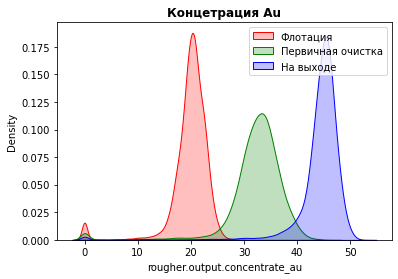

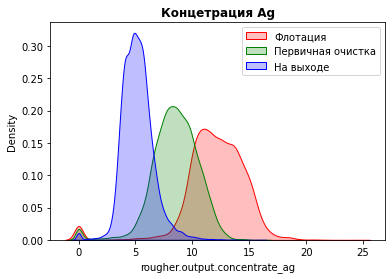

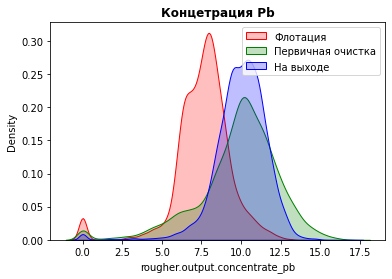

In [ ]:
plt.title('Концетрация Au', fontweight='bold')
fig = sns.kdeplot(full_data['rougher.output.concentrate_au'],color='r', legend=True,shade=True)
fig = sns.kdeplot(full_data['primary_cleaner.output.concentrate_au'],color='g', legend=True,shade=True)
fig = sns.kdeplot(full_data['final.output.concentrate_au'],color='b', legend=True,shade=True)
plt.legend(['Флотация', 'Первичная очистка', "На выходе" ], loc=1)     
plt.show()

plt.title('Концетрация Ag', fontweight='bold')
fig = sns.kdeplot(full_data['rougher.output.concentrate_ag'],color='r', legend=True,shade=True)
fig = sns.kdeplot(full_data['primary_cleaner.output.concentrate_ag'],color='g', legend=True,shade=True)
fig = sns.kdeplot(full_data['final.output.concentrate_ag'],color='b', legend=True,shade=True)
plt.legend(['Флотация', 'Первичная очистка', "На выходе" ], loc=1)     
plt.show()

plt.title('Концетрация Pb', fontweight='bold')
fig = sns.kdeplot(full_data['rougher.output.concentrate_pb'],color='r', legend=True,shade=True)
fig = sns.kdeplot(full_data['primary_cleaner.output.concentrate_pb'],color='g', legend=True,shade=True)
fig = sns.kdeplot(full_data['final.output.concentrate_pb'],color='b', legend=True,shade=True)
plt.legend(['Флотация', 'Первичная очистка', "На выходе" ], loc=1)     
plt.show()

На каждом из графиков видны аномальные значения в нуле, наверное это отвальные хвосты. Концентрация золота увеличивается после каждого этапа очистки


    Концентрация золота увеличивается после каждого этапа очистки
    Концентрация серебра увеличивается после флотации и уменьшается после следующих этапов
    Концентрация свинца снижается после первого этапа очистки 

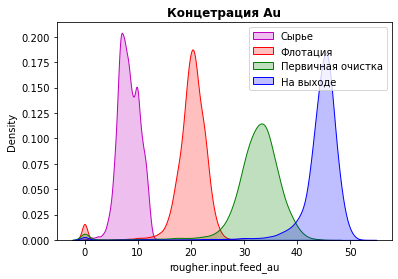

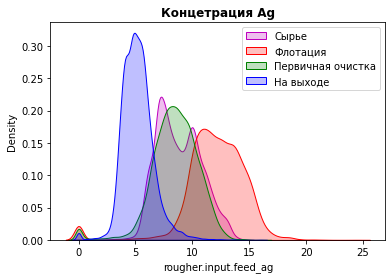

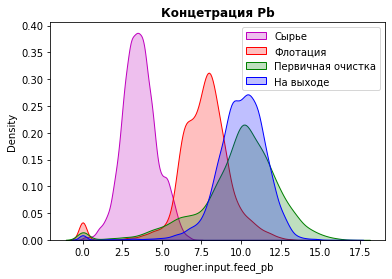

In [ ]:
plt.title('Концетрация Au', fontweight='bold')
fig = sns.kdeplot(full_data['rougher.input.feed_au'],color='m', legend=True,shade=True)
fig = sns.kdeplot(full_data['rougher.output.concentrate_au'],color='r', legend=True,shade=True)
fig = sns.kdeplot(full_data['primary_cleaner.output.concentrate_au'],color='g', legend=True,shade=True)
fig = sns.kdeplot(full_data['final.output.concentrate_au'],color='b', legend=True,shade=True)
plt.legend(['Сырье','Флотация', 'Первичная очистка', "На выходе" ], loc=1)     
plt.show()

plt.title('Концетрация Ag', fontweight='bold')
fig = sns.kdeplot(full_data['rougher.input.feed_ag'],color='m', legend=True,shade=True)
fig = sns.kdeplot(full_data['rougher.output.concentrate_ag'],color='r', legend=True,shade=True)
fig = sns.kdeplot(full_data['primary_cleaner.output.concentrate_ag'],color='g', legend=True,shade=True)
fig = sns.kdeplot(full_data['final.output.concentrate_ag'],color='b', legend=True,shade=True)
plt.legend(['Сырье','Флотация', 'Первичная очистка', "На выходе" ], loc=1)     
plt.show()

plt.title('Концетрация Pb', fontweight='bold')
fig = sns.kdeplot(full_data['rougher.input.feed_pb'],color='m', legend=True,shade=True)
fig = sns.kdeplot(full_data['rougher.output.concentrate_pb'],color='r', legend=True,shade=True)
fig = sns.kdeplot(full_data['primary_cleaner.output.concentrate_pb'],color='g', legend=True,shade=True)
fig = sns.kdeplot(full_data['final.output.concentrate_pb'],color='b', legend=True,shade=True)
plt.legend(['Сырье','Флотация', 'Первичная очистка', "На выходе" ], loc=1)      
plt.show()

##### Распределения размеров гранул сырья

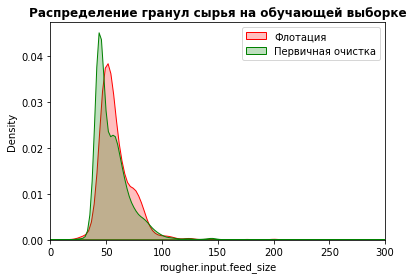

In [ ]:
plt.title('Распределение гранул сырья на обучающей выборке', fontweight='bold')
fig = sns.kdeplot(train_data['rougher.input.feed_size'],color='r', legend=True,shade=True)
fig = sns.kdeplot(test_data['rougher.input.feed_size'],color='g', legend=True,shade=True)
plt.legend(['Флотация', 'Первичная очистка'], loc=1)     
plt.xlim(0, 300)
plt.show()

In [ ]:
feed_size_train = train_data['rougher.input.feed_size'].mean()
print('Среднее распределение гранул на обучающей выборке:',feed_size_train)
feed_size_test = test_data['rougher.input.feed_size'].mean()
print('Среднее распределение гранул на тестовой выборке:',feed_size_test)

Среднее распределение гранул на обучающей выборке: 60.23985599255732
Среднее распределение гранул на тестовой выборке: 55.952754028895136


Распределения не сильно отличаются друг от друга - оценка модели правильная.

##### Суммарная концентрация всех веществ на разных стадиях

In [ ]:
full_data['raw'] = full_data[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
full_data['rough concentrate'] = full_data[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
full_data['primary concentrate'] = full_data[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']].sum(axis=1)
full_data['final concentrate'] = full_data[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)

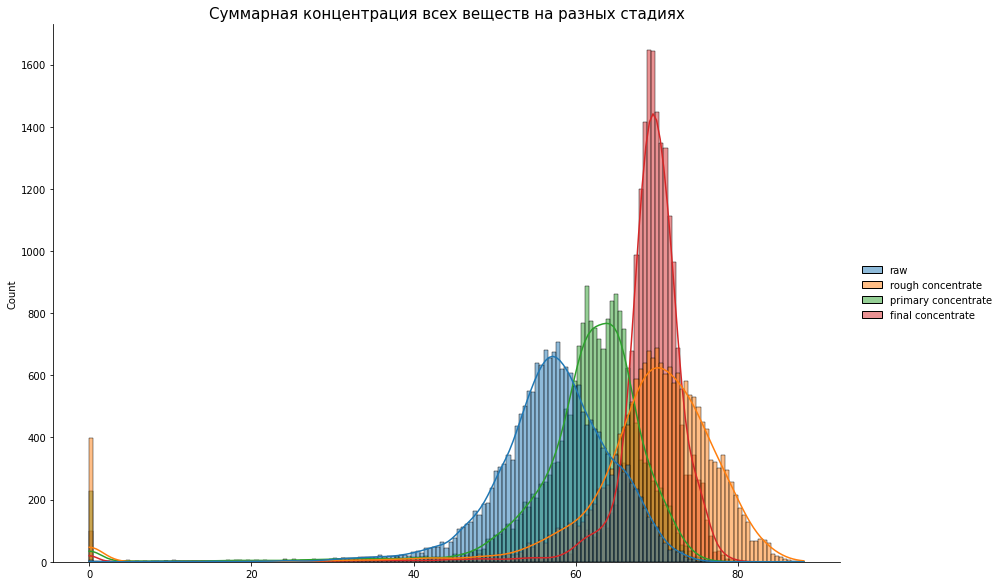

In [ ]:
sns.displot(full_data[['raw', 'rough concentrate', 'primary concentrate', 'final concentrate']], legend=True, kde=True, height=8, aspect=1.5)  
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)
plt.show()

Суммарная концентрация всех веществ на разных стадиях для некоторых объектов равна 0. И имеет аномально большое количество таких значений судя по распределениям. 0 данные стоит удалить, они могут негативно повлиять на работу будущей модели.

Удалим нулевые значения.

In [ ]:
good_data = full_data[
    (full_data['raw'] >  0) & 
    (full_data['rough concentrate'] > 0) & 
    (full_data['primary concentrate'] > 0) & 
    (full_data['final concentrate'] > 0)]

## Модель

###### Напишем функцию для рассчета метрики качества модели - sMAPE (Symmetric Mean Absolute Percentage Error).

In [ ]:
def smape (target, predictions):
    return 100/len(target) * np.sum(2 * np.abs(predictions - target) / (np.abs(target) + np.abs(predictions)))

##### А также функцию для рассчета итогового sMAPE.

In [ ]:
def final_smape (rougher, final):
    return 0.25 * rougher + 0.75 * final

In [ ]:
target_rougher_train = train_data['rougher.output.recovery']
target_final_train = train_data['final.output.recovery']

features_train = train_data.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis='columns')

Масштабируем признаки.

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

Проверим несколько моделей методом кросс-валидации и выберем лучший результат.

In [ ]:
scorer = make_scorer(smape, greater_is_better=False)

In [ ]:
model_dtr = DecisionTreeRegressor(random_state=666)
cross_val_score(model_dtr, features_train, target_rougher_train, scoring=scorer, cv=5).mean()

-18.07270091879001

In [ ]:
model_lr = LinearRegression()
cross_val_score(model_lr, features_train, target_rougher_train, scoring=scorer, cv=5).mean()

-12.80248345848199

In [ ]:

for depth in range(1, 10): # подобрал параметры заранее 
    
    
    for estimator in range(1,20,1):
        min_final_smape = 1000    
        model = RandomForestRegressor(random_state=12345, 
                                       n_estimators=estimator, 
                                       max_depth=depth)
        
        scorer = make_scorer(smape, greater_is_better=False) 
    
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=4, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=4, scoring=scorer).mean()
        
        final_smape_result = final_smape(cross_val_score_rougher, cross_val_score_final)
        
        if final_smape_result < min_final_smape:
            
            min_final_smape = final_smape_result
        
    print('Итоговое sMAPE:', min_final_smape)

Итоговое sMAPE: -11.765294836131238
Итоговое sMAPE: -11.15026148595041
Итоговое sMAPE: -11.192162289419617
Итоговое sMAPE: -11.325229098999838
Итоговое sMAPE: -11.291677449002854
Итоговое sMAPE: -11.33035649969824
Итоговое sMAPE: -11.616443136399138
Итоговое sMAPE: -11.914630450459914
Итоговое sMAPE: -12.172277335530335


Лучший результат показывает модель RandomForestRegressor. Обучим её.

Подготовим features и target для тестовой выборки и масштабируем признаки.

In [ ]:
target_rougher_test = test_data['rougher.output.recovery']
target_final_test = test_data['final.output.recovery']

features_test = test_data.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis='columns')

Обучим модель и получим предсказания.

In [ ]:
features_test = scaler.transform(features_test)

In [ ]:
model_final = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=6)

model_final.fit(features_train, target_rougher_train)
predictions_rougher = model_final.predict(features_test)

model_final.fit(features_train, target_final_train)
predictions_final = model_final.predict(features_test)

Посчитаем sMAPE для обоих признаков и итоговый.

In [ ]:
smape_rougher = smape(target_rougher_test, predictions_rougher)

In [ ]:
smape_final = smape(target_final_test, predictions_final)

In [ ]:
final_smape(smape_rougher, smape_final)

10.69263262434868

In [ ]:
dummy = DummyRegressor(strategy = 'mean')
dummy_1 = DummyRegressor(strategy = 'mean')

dummy_rougher = dummy.fit(features_train, target_rougher_train)
dummy_predictions_rougher = pd.Series(dummy_rougher.predict(features_train))

dummy_final = dummy_1.fit(features_train, target_final_train)
dummy_predictions_final = pd.Series(dummy_final.predict(features_train))

In [ ]:
smape_rougher_dummy = smape(target_rougher_test, dummy_predictions_rougher)

In [ ]:
smape_final_dummy = smape(target_final_test, dummy_predictions_final)

In [ ]:
final_smape(smape_rougher_dummy, smape_final_dummy)

10.289630376021034

Обученная модель предсказывает результат хуже константной.

##### Общий вывод
    Подготовлены данные.
    Проведен исследовательский анализ данных.
    Итоговая модель построена на алгоритме RandomForestRegressor.
    Обученная модель предсказывает результат хуже константной.